In [1]:
# Libraries for Feature Engineering
import seaborn as sns

In [2]:
# Libraries for Data Structures
import pandas as pd
import numpy as np

In [3]:
# Libraries for Creating Pipelines
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

In [4]:
# Libraries for Data Pre-processing and Processing
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [5]:
# Libraries For Model Formation
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn import linear_model
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

In [6]:
# Libraries for Model Evaluation
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import accuracy_score, classification_report


# Dataset Customisation

In [7]:
# Importing Dataset from csv file
raw_data = pd.read_csv('/datasets/alzheimers.csv')

# Gives total no.of rows and columns
raw_data.shape

(373, 15)

In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


## ***DataSet Columns Defination***

```
1. Subject ID: Unique identifier for each subject in the dataset.
2. MRI ID: Unique identifier for each MRI scan.
3. Group: Represents the group or condition of the subject (e.g., 'AD' for Alzheimer's Disease).
4. Visit: Number indicating the visit sequence for a particular subject.
5. MR Delay: Time delay between consecutive MRI scans for a subject.
6. M/F: Gender of the subject (Male or Female).
7. Hand: Handedness of the subject (e.g., 'R' for right-handed).
8. Age: Age of the subject.
9. EDUC: Years of education completed by the subject.
10. SES: Socioeconomic status of the subject.
11. MMSE: Mini-Mental State Examination score, a measure of cognitive function.
12. CDR: Clinical Dementia Rating, a measure of dementia severity.
13. eTIV: Estimated total intracranial volume.
14. nWBV: Normalized whole brain volume.
15. ASF: Atlas scaling factor, a measure related to brain size normalization.
    
```



In [9]:
new_column_names = ['Id','MRI_ID', 'Target_Variable', 'Visit_Counts', 'MRI_Scan_Delay','Gender', 'Dominant_Hand', 'Age', 'Education', 'Socioeconomic_Status', 'Mini_Mental_State_Examination', 'Clinical_Dementia_Rating', 'Estimated_Total_Intracranial_Volume', 'Normalize_Whole_Brain_Volume', 'Atlas_Scaling_Factor']
raw_data.rename(columns={old_column_name: new_column_name for old_column_name, new_column_name in zip(raw_data.columns, new_column_names)}, inplace=True)

# Feature Engineering

## Feature Selection

<ipython-input-10-43c298583b53>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = raw_data.corr()


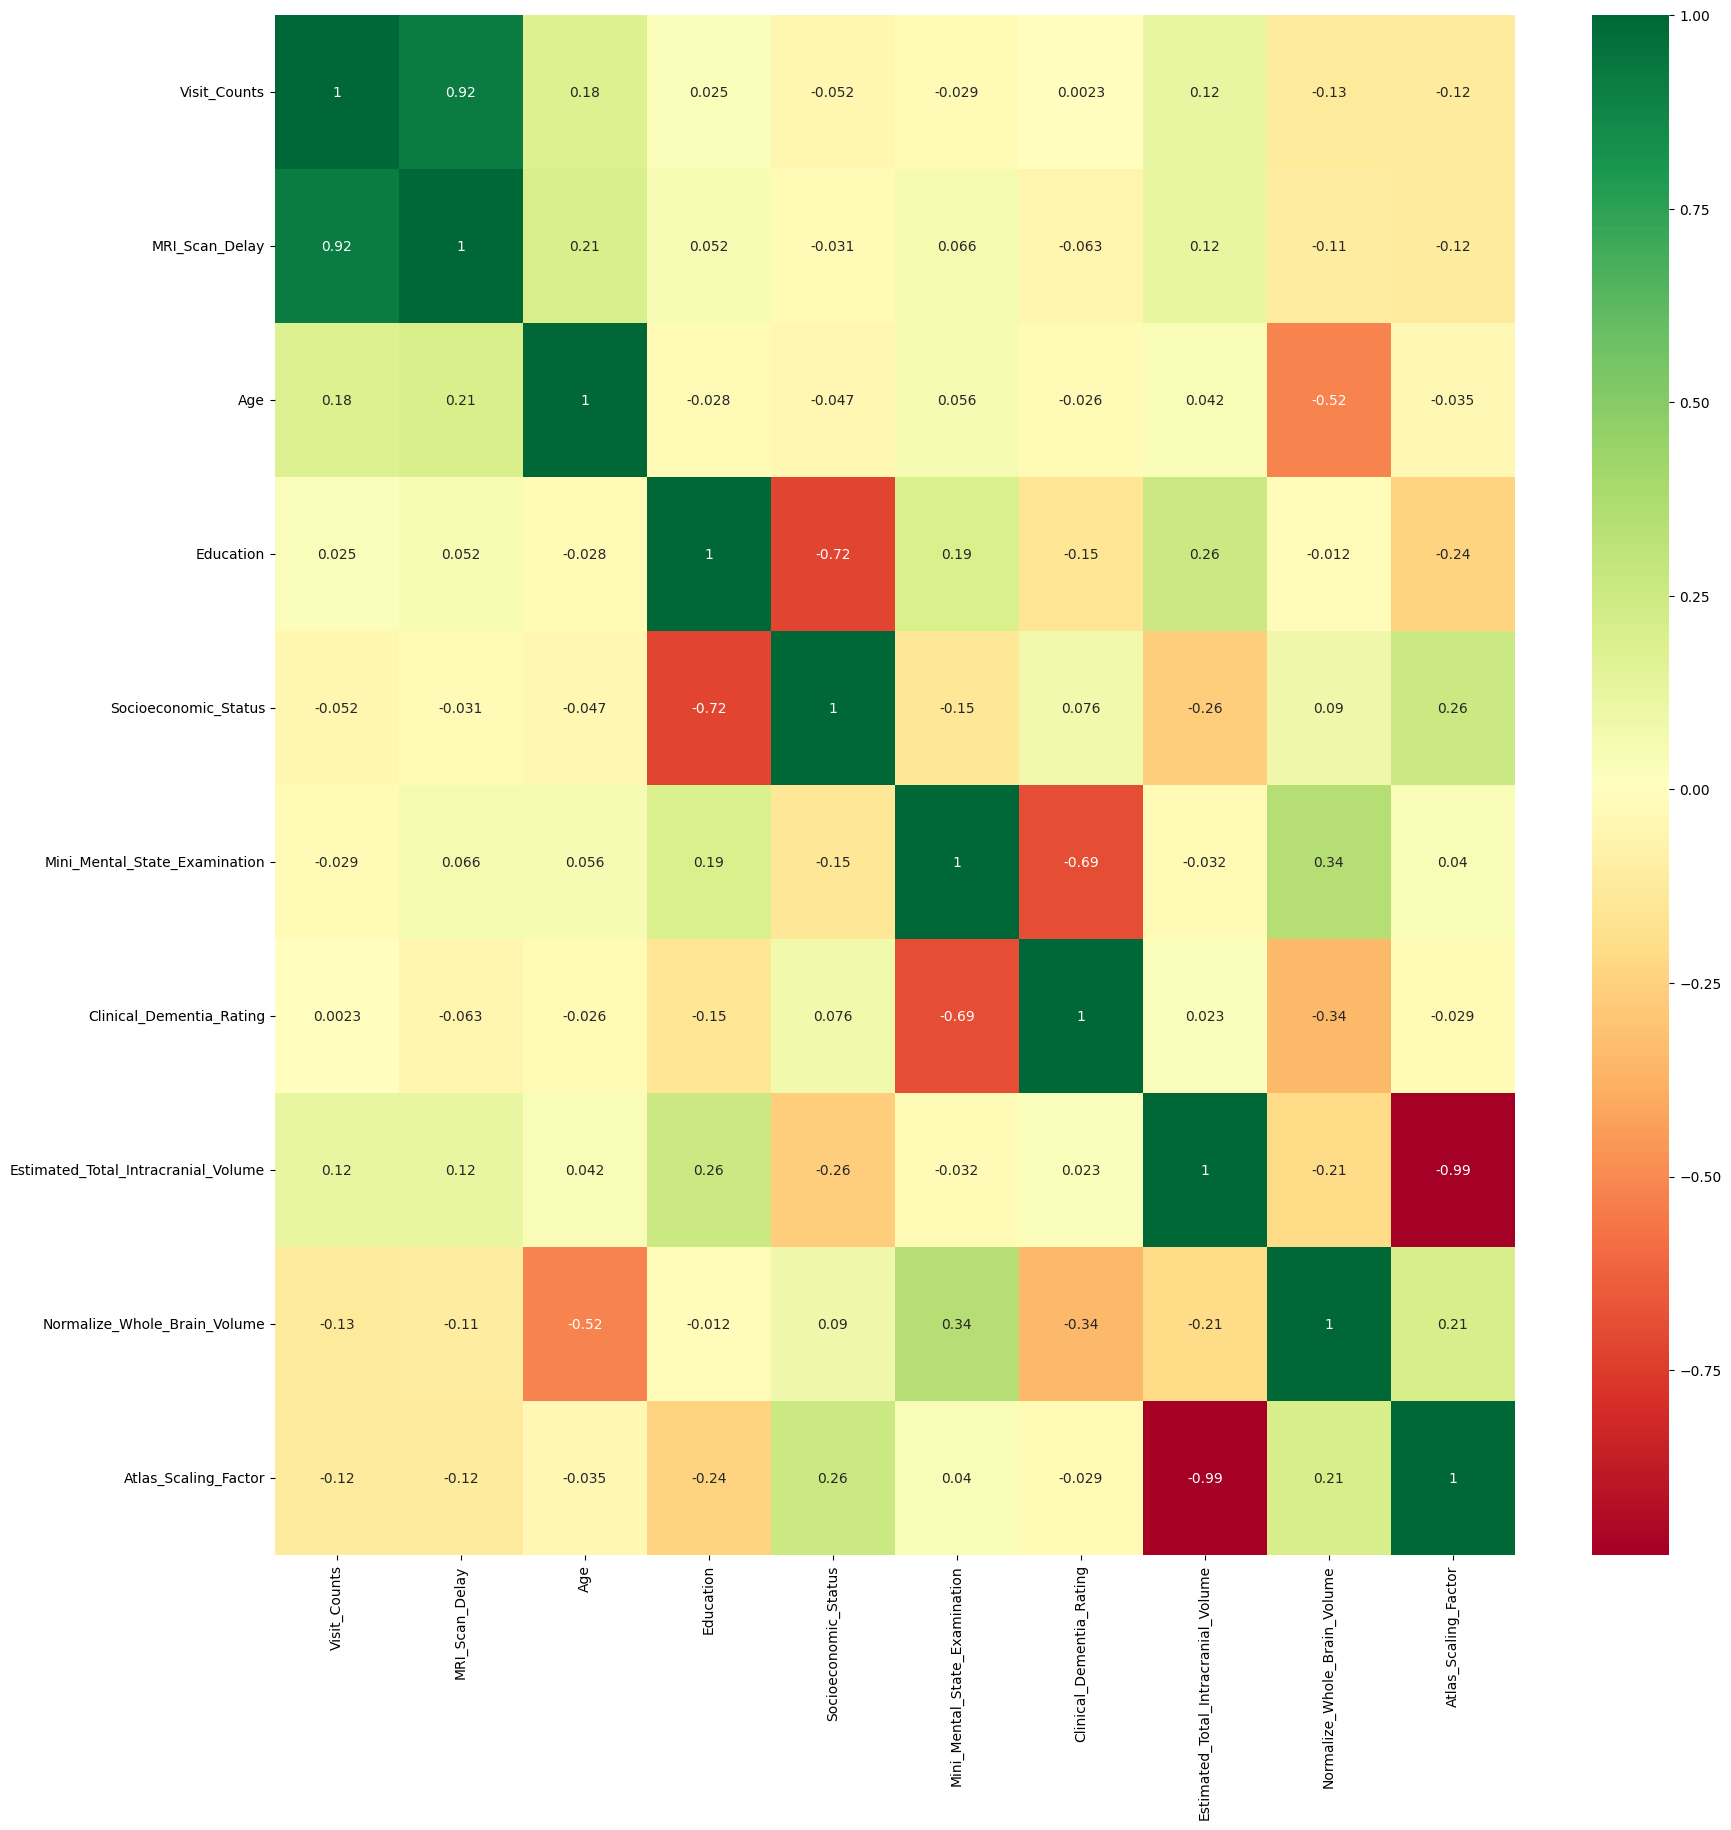

In [10]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = raw_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(raw_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Dropping Non-Required Featues

In [11]:
raw_data.drop(['Id', 'MRI_ID','Gender', 'Dominant_Hand'], axis=1, inplace=True)

In [12]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Target_Variable                      373 non-null    object 
 1   Visit_Counts                         373 non-null    int64  
 2   MRI_Scan_Delay                       373 non-null    int64  
 3   Age                                  373 non-null    int64  
 4   Education                            373 non-null    int64  
 5   Socioeconomic_Status                 354 non-null    float64
 6   Mini_Mental_State_Examination        371 non-null    float64
 7   Clinical_Dementia_Rating             373 non-null    float64
 8   Estimated_Total_Intracranial_Volume  373 non-null    int64  
 9   Normalize_Whole_Brain_Volume         373 non-null    float64
 10  Atlas_Scaling_Factor                 373 non-null    float64
dtypes: float64(5), int64(5), object(

## Converting Category into Numerical Values

In [14]:
# Converting Target Variables to Binary Target Values
raw_data.Target_Variable.replace(['Demented','Converted'], 1, inplace=True)
raw_data.Target_Variable.replace('Nondemented', 0, inplace=True)
raw_data['Target_Variable'].value_counts()

0    190
1    183
Name: Target_Variable, dtype: int64

# Dataset Pre-Processing and Processing

In [15]:
# Separate labels and features
X = raw_data.drop(['Target_Variable'], axis=1)
y = raw_data['Target_Variable']


# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X_scaled)

# Data Augmentation
smote = SMOTE(random_state=42)
X_imputed_smote, y_smote = smote.fit_resample(X_imputed, y)

# Now, split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed_smote, y_smote, test_size=0.2, random_state=42)

# Model Formations

In [16]:
# Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5, 10]}
rf_grid = GridSearchCV(rf_model, rf_params, cv=5)
rf_grid.fit(X_train, y_train)
best_rf_model = rf_grid.best_estimator_

cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5)
print(f"{best_rf_model} CV Accuracy: {np.mean(cv_scores) * 100:.2f}%")

# Fit the model on the entire dataset
best_rf_model.fit(X_train, y_train)
y_pred = best_rf_model.predict(X_test)

print("-------------------------------------------------------")
# Training accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"{best_rf_model} Training Accuracy: {accuracy * 100:.2f}%")
print("-------------------------------------------------------")

# Classification report
print(f"{best_rf_model} Classification Report:\n{classification_report(y_test, y_pred)}")
print("-------------------------------------------------------")

RandomForestClassifier(random_state=42) CV Accuracy: 95.07%
-------------------------------------------------------
RandomForestClassifier(random_state=42) Training Accuracy: 93.42%
-------------------------------------------------------
RandomForestClassifier(random_state=42) Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        34
           1       0.97      0.90      0.94        42

    accuracy                           0.93        76
   macro avg       0.93      0.94      0.93        76
weighted avg       0.94      0.93      0.93        76

-------------------------------------------------------


In [17]:
# LightGBM Classifier
lgbm_model = LGBMClassifier(random_state=42)
lgbm_params = {'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7], 'num_leaves': [31, 50, 100]}
lgbm_grid = GridSearchCV(lgbm_model, lgbm_params, cv=5)
lgbm_grid.fit(X_train, y_train)
best_lgbm_model = lgbm_grid.best_estimator_

# Fit the model on the entire dataset
best_lgbm_model.fit(X_train, y_train)
y_pred = best_lgbm_model.predict(X_test)

print("-------------------------------------------------------")
# Training accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"{best_lgbm_model} Training Accuracy: {accuracy * 100:.2f}%")
print("-------------------------------------------------------")

# Classification report
print(f"{best_lgbm_model} Classification Report:\n{classification_report(y_test, y_pred)}")
print("-------------------------------------------------------")

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [18]:
# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 10]}
gb_grid = GridSearchCV(gb_model, gb_params, cv=5)
gb_grid.fit(X_train, y_train)
best_gb_model = gb_grid.best_estimator_

# Fit the model on the entire dataset
best_lgbm_model.fit(X_train, y_train)
y_pred = best_lgbm_model.predict(X_test)

print("-------------------------------------------------------")
# Training accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"{best_lgbm_model} Training Accuracy: {accuracy * 100:.2f}%")
print("-------------------------------------------------------")

# Classification report
print(f"{best_lgbm_model} Classification Report:\n{classification_report(y_test, y_pred)}")
print("-------------------------------------------------------")

[LightGBM] [Info] Number of positive: 148, number of negative: 156
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 304, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.486842 -> initscore=-0.052644
[LightGBM] [Info] Start training from score -0.052644
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [19]:
# XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)
xgb_params = {'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7], 'min_child_weight': [1, 5, 10], 'subsample': [0.8, 1.0]}
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=5)
xgb_grid.fit(X_train, y_train)
best_xgb_model = xgb_grid.best_estimator_

# Fit the model on the entire dataset
best_xgb_model.fit(X_train, y_train)
y_pred = best_xgb_model.predict(X_test)

print("-------------------------------------------------------")
# Training accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"{best_xgb_model} Training Accuracy: {accuracy * 100:.2f}%")
print("-------------------------------------------------------")

# Classification report
print(f"{best_xgb_model} Classification Report:\n{classification_report(y_test, y_pred)}")
print("-------------------------------------------------------")

-------------------------------------------------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...) Training Accuracy: 90.79%
-------------------------------------------------------
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_byno

In [20]:

# Support Vector Classifier
svc_model = make_pipeline(StandardScaler(), SVC(random_state=42, probability=True))
svc_params = {'svc__C': [0.1, 1, 10], 'svc__kernel': ['linear', 'rbf']}
svc_grid = GridSearchCV(svc_model, svc_params, cv=5)
svc_grid.fit(X_train, y_train)
best_svc_model = svc_grid.best_estimator_

# Fit the model on the entire dataset
best_svc_model.fit(X_train, y_train)
y_pred = best_svc_model.predict(X_test)

print("-------------------------------------------------------")
# Training accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"{best_svc_model} Training Accuracy: {accuracy * 100:.2f}%")
print("-------------------------------------------------------")

# Classification report
print(f"{best_svc_model} Classification Report:\n{classification_report(y_test, y_pred)}")
print("-------------------------------------------------------")

-------------------------------------------------------
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=0.1, kernel='linear', probability=True,
                     random_state=42))]) Training Accuracy: 92.11%
-------------------------------------------------------
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=0.1, kernel='linear', probability=True,
                     random_state=42))]) Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92        34
           1       0.97      0.88      0.93        42

    accuracy                           0.92        76
   macro avg       0.92      0.93      0.92        76
weighted avg       0.93      0.92      0.92        76

-------------------------------------------------------


In [21]:

# MLP Classifier
mlp_model = make_pipeline(StandardScaler(), MLPClassifier(random_state=42))
mlp_params = {'mlpclassifier__hidden_layer_sizes': [(50,), (100,), (50, 50)], 'mlpclassifier__alpha': [0.0001, 0.001, 0.01]}
mlp_grid = GridSearchCV(mlp_model, mlp_params, cv=5)
mlp_grid.fit(X_train, y_train)
best_mlp_model = mlp_grid.best_estimator_

# Fit the model on the entire dataset
best_svc_model.fit(X_train, y_train)
y_pred = best_svc_model.predict(X_test)

print("-------------------------------------------------------")
# Training accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"{best_svc_model} Training Accuracy: {accuracy * 100:.2f}%")
print("-------------------------------------------------------")

# Classification report
print(f"{best_svc_model} Classification Report:\n{classification_report(y_test, y_pred)}")
print("-------------------------------------------------------")

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

-------------------------------------------------------
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=0.1, kernel='linear', probability=True,
                     random_state=42))]) Training Accuracy: 92.11%
-------------------------------------------------------
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc',
                 SVC(C=0.1, kernel='linear', probability=True,
                     random_state=42))]) Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92        34
           1       0.97      0.88      0.93        42

    accuracy                           0.92        76
   macro avg       0.92      0.93      0.92        76
weighted avg       0.93      0.92      0.92        76

-------------------------------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [22]:
# KNeighbors Classifier
knn = KNeighborsClassifier(n_neighbors=15)
knn_model = knn.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
accuracy=roc_auc_score(y_test, y_pred)*100
print(f'Accuracy : {accuracy}')


Accuracy : 89.00560224089635


In [23]:
# Logistic Regression
logistic_regression = LogisticRegression(C = 0.2)
logistic_regression_model = logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression_model.predict(X_test)
accuracy=roc_auc_score(y_test, y_pred)*100
print(f'Accuracy : {accuracy}')

Accuracy : 92.57703081232492


In [24]:
# Decision Tree Classifier
decision_tree = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
accuracy=roc_auc_score(y_test, y_pred)*100
print(f'Accuracy : {accuracy}')

Accuracy : 86.69467787114846


In [25]:
# Random Forest Classifier
random_forest = RandomForestClassifier(max_depth=5, random_state=0).fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
accuracy=roc_auc_score(y_test, y_pred)*100
print(f'Accuracy : {accuracy}')

Accuracy : 93.76750700280111


In [26]:
# Support Vector Machines
svc_model = SVC(gamma='auto').fit(X_train, y_train)
y_pred = svc_model.predict(X_test)
accuracy=roc_auc_score(y_test, y_pred)*100
print(f'Accuracy : {accuracy}')

Accuracy : 92.57703081232492
